In [36]:
#tensor flow guide book https://archive.org/details/ai-ml/page/24/mode/2up
import tensorflow as tf # for ML and we will be using a tensorflow data set/ the mnist number data set
#tensorflow guide https://www.tensorflow.org/guide/keras/sequential_model
import numpy as np #working with arrays
import matplotlib.pyplot as plt # for visualization
import cv2 #for computer vision
import os


In [37]:
# using my own data this time https://www.youtube.com/watch?v=q7ZuZ8ZOErE
#we will still greyscale data reason being it takes the intensity of the light to formulate image recognition processes.
#------------



When we train our own data
using sklearn

from sklearn.model_selection import train_test_split

 Assuming you have your data in variables x (images) and y (labels)

 Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

 test_size=0.2 indicates that 20% of the data will be used for testing
 random_state is used to ensure reproducibility, setting it to a fixed value ensures the same random split each time you run the code

for the datapipeline it would probably benefit from using tf.datasets framework for images 
pandas for statistical data 
refer to this page:
https://www.tensorflow.org/guide/data


In [38]:
#now lets normalize the data/grey scaling 
"""gray scale pixel has value of  255  normalizing would make it between 0 and 1 
it will be scaling things down the value of 125 might look like 0.5"""

"""axis=-1:
When axis=-1, normalization is performed along the last axis of the input data.
In the context of a 2D tensor (like a matrix), where the first axis corresponds to rows and the second axis corresponds to columns, axis=-1 implies normalization is performed along the columns.
This means that each feature (column) in the input data is independently normalized across the samples.
axis=1:
When axis=1, normalization is performed along the second axis of the input data.
In the context of a 2D tensor, where the first axis corresponds to rows and the second axis corresponds to columns, axis=1 implies normalization is performed along the rows.
This means that each sample (row) in the input data is independently normalized across its features.

Normalization Along Rows:
With axis=0, normalization is applied along each feature (column) across all the samples (rows).
Each feature's mean and standard deviation are calculated across all the samples, considering all the values of that feature across all samples.
The normalization is then applied to each sample's feature values based on these aggregated statistics.

"""
x_train= tf.keras.utils.normalize(x_train, axis= 1)
x_test = tf.keras.utils.normalize(x_test, axis =1)

In [39]:
#check the shape of what x_train and x_test is
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [40]:
# Plot some of the images from the training set
"""
plt.figure(figsize=(10, 10))
for i in range(25):  # Plotting the first 25 images
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')  # Turn off axis labels
    plt.title(f'Label: {y_train[i]}')  # Show the label as the title
plt.show()
"""

"\nplt.figure(figsize=(10, 10))\nfor i in range(25):  # Plotting the first 25 images\n    plt.subplot(5, 5, i + 1)\n    plt.imshow(x_train[i], cmap='gray')\n    plt.axis('off')  # Turn off axis labels\n    plt.title(f'Label: {y_train[i]}')  # Show the label as the title\nplt.show()\n"

In [41]:
"""
this is convulitonal one to do larger scaled
import tensorflow as tf

# Define input shape
input_shape = (None, None, 1)  # Allow variable input size for height and width, and 1 channel for grayscale

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=input_shape))
model.add(tf.keras.layers.Rescaling(1./255))  # Rescale pixel values to [0, 1]

# Add convolutional layers
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Global average pooling
model.add(tf.keras.layers.GlobalAveragePooling2D())

# Add fully connected layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()
"""

"\nthis is convulitonal one to do larger scaled\nimport tensorflow as tf\n\n# Define input shape\ninput_shape = (None, None, 1)  # Allow variable input size for height and width, and 1 channel for grayscale\n\nmodel = tf.keras.models.Sequential()\nmodel.add(tf.keras.layers.Input(shape=input_shape))\nmodel.add(tf.keras.layers.Rescaling(1./255))  # Rescale pixel values to [0, 1]\n\n# Add convolutional layers\nmodel.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))\nmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))\nmodel.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))\nmodel.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))\nmodel.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))\n\n# Global average pooling\nmodel.add(tf.keras.layers.GlobalAveragePooling2D())\n\n# Add fully connected layers\nmodel.add(tf.keras.layers.Dense(128, activation='relu'))\nmodel.add(tf.keras.layers.Dropout(0.5))\nmodel.add(tf.keras.layers

In [42]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28))) #flattens the data turns the pixels from 28x28 to a line between 784
#flatten turns it from 2-D to a 1-D array

#add relu layer and softmax/optimization functions below:
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu)) #model.add(tf.keras.layers.Dense(128,activation = 'relu')) relu follows something simlar to
#sigmoid activation relu = f(x)=max(0,x) It returns 0 for all negative inputs and returns the input value for all positive inputs.

#relu is the activation function in the dense layer and 128 is the number of units
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu)) # make a second layer 
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax)) # now the softmax layer all the 10 neurons will add up to one 
#softmax is the output layer


In [43]:
"""
#how relu works:
import numpy as np

# Define a sample input array
input_array = np.array([-2, -1, 0, 1, 2])

# Apply ReLU activation function
output_array = np.maximum(0, input_array)

print("Input array:", input_array)
print("Output array (ReLU):", output_array)

#Input array: [-2 -1  0  1  2]
#Output array (ReLU): [0 0 0 1 2]


#how softmax works:
import numpy as np

def softmax(logits):
    exp_logits = np.exp(logits)
    softmax_scores = exp_logits / np.sum(exp_logits)
    return softmax_scores

# Example logits (raw scores)
logits = np.array([2.0, 1.0, 0.1])

# Compute softmax probabilities
probabilities = softmax(logits)

print("Raw Scores (Logits):", logits)
print("Softmax Probabilities:", probabilities)
print("Sum of Probabilities:", np.sum(probabilities))

#Raw Scores (Logits): [2.  1.  0.1]
#Softmax Probabilities: [0.65900114 0.24243297 0.09856589]
#Sum of Probabilities: 1.0
"""


'\n#how relu works:\nimport numpy as np\n\n# Define a sample input array\ninput_array = np.array([-2, -1, 0, 1, 2])\n\n# Apply ReLU activation function\noutput_array = np.maximum(0, input_array)\n\nprint("Input array:", input_array)\nprint("Output array (ReLU):", output_array)\n\n#Input array: [-2 -1  0  1  2]\n#Output array (ReLU): [0 0 0 1 2]\n\n\n#how softmax works:\nimport numpy as np\n\ndef softmax(logits):\n    exp_logits = np.exp(logits)\n    softmax_scores = exp_logits / np.sum(exp_logits)\n    return softmax_scores\n\n# Example logits (raw scores)\nlogits = np.array([2.0, 1.0, 0.1])\n\n# Compute softmax probabilities\nprobabilities = softmax(logits)\n\nprint("Raw Scores (Logits):", logits)\nprint("Softmax Probabilities:", probabilities)\nprint("Sum of Probabilities:", np.sum(probabilities))\n\n#Raw Scores (Logits): [2.  1.  0.1]\n#Softmax Probabilities: [0.65900114 0.24243297 0.09856589]\n#Sum of Probabilities: 1.0\n'

In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#uses adam optimization make sure you spell the loss function right

Cross-entropy is a concept from information theory and is commonly used as a loss function in machine learning, particularly in classification tasks. Mathematically, cross-entropy measures the difference between two probability distributions: the predicted probability distribution and the true probability distribution.

Given:

p(y): The true probability distribution of the classes. For example, in binary classification,  p(y) could be a one-hot encoded vector representing the true class label.

q(y): The predicted probability distribution of the classes. For example, output of a softmax function representing predicted class probabilities.

The cross-entropy between 
p and q, denoted as H(p,q), is defined as:
H(p, q) = -\sum_{i} p(y_i) \log(q(y_i))
Where:

i iterates over all classes,

p(y_i)  is the true probability of class i

q(y_i) is the predicted probability of class i

In binary classification, where  p(y) is a one-hot encoded vector with the true class label, the cross-entropy simplifies to the following form:
H(p, q) = -[p(y) \log(q(y)) + (1 - p(y)) \log(1 - q(y))]



In [45]:
#fit the model pass the training data

model.fit(x_train,y_train, epochs=3) 
# epochs is how many iterations the model will see the data

#you can use clusting nearest neighbor instead / convolutional neural netoworks or

model.save('handwritten.model')

Epoch 1/3
1875/1875 [==============================] - 2s 919us/step - loss: 0.2603 - accuracy: 0.9225
Epoch 2/3
1875/1875 [==============================] - 2s 909us/step - loss: 0.1069 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 2s 899us/step - loss: 0.0725 - accuracy: 0.9772
INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [46]:
model = tf.keras.models.load_model('handwritten.model')
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
#low loss and high accuracy is better 
#will write to a .pb file with the name of handwritten model 
#pb stands for proto buffer
# protobuffer is data type like json

313/313 [==============================] - 0s 693us/step - loss: 0.0992 - accuracy: 0.9693
Test Loss: 0.09924504905939102
Test Accuracy: 0.9692999720573425


1/1 [==============================] - 0s 33ms/step
the number is probably 1


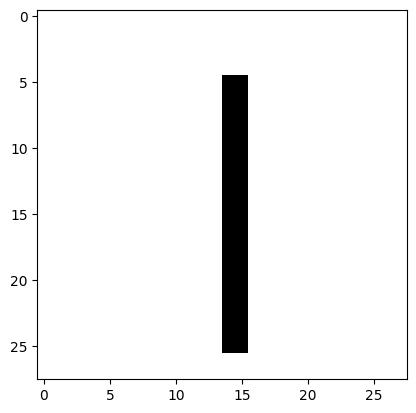

1/1 [==============================] - 0s 13ms/step
the number is probably 3


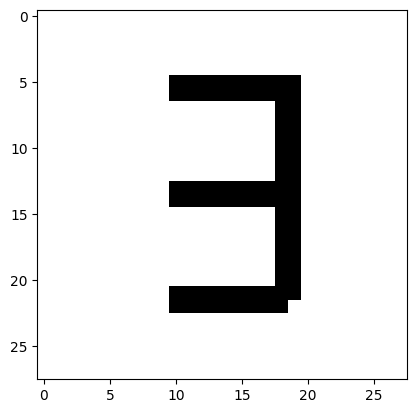

In [47]:


#use os stream and paint to test this model


#https://www.youtube.com/watch?v=bte8Er0QhDg need fo figure out why the path isnt working
image_number = 0
predictions = []

while os.path.isfile(f"Numbers/number{image_number}.png"):
    try:
        img = cv2.imread(f"Numbers/number{image_number}.png")[:,:,0]
        #img = cv2.imread(f"foldername/label{image_number}.png")[::0]#we dont care about colors so [:,:,0] will be white on black inverted
        #need to invert it to be black on white use numpy to invert the numbers
        img = np.invert(np.array([img])) 
        #img will be an array of a list of img
        prediction = model.predict(img)
        print(f"the number is probably {np.argmax(prediction)}") #argmax gives index of the field of with the highest number which neuron has the highest activation
        #zeroth with represent zero the first will represent 1
        predictions.append(np.argmax(prediction))
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print("error")
    finally: #nomatter what this will execute
        image_number+=1

#if model doesn't work well train with more epoch



In [48]:
"""
import cv2

# Specify the path to the image file
file_path = "C:\\Users\\mikec\\openmath\\Numbers\\number1.png"

# Read the image using OpenCV
img = cv2.imread(file_path)

# Check if the image was successfully loaded
if img is not None:
    # Display the image in a window
    cv2.imshow('Number 1', img)
    # Wait for any key press to close the window
    cv2.waitKey(0)
    # Close all OpenCV windows
    cv2.destroyAllWindows()
else:
    print("Failed to load the image.")
"""

'\nimport cv2\n\n# Specify the path to the image file\nfile_path = "C:\\Users\\mikec\\openmath\\Numbers\\number1.png"\n\n# Read the image using OpenCV\nimg = cv2.imread(file_path)\n\n# Check if the image was successfully loaded\nif img is not None:\n    # Display the image in a window\n    cv2.imshow(\'Number 1\', img)\n    # Wait for any key press to close the window\n    cv2.waitKey(0)\n    # Close all OpenCV windows\n    cv2.destroyAllWindows()\nelse:\n    print("Failed to load the image.")\n'

In [49]:
print(predictions)

[1, 3]
